In [39]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.optimize import curve_fit
import numpy as np

In [40]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [41]:
tesla = yf.Ticker("TSLA")

In [42]:
tesla_data = tesla.history(period="max")

In [43]:
tesla_data.reset_index(inplace=True)
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3739,2025-05-09 00:00:00-04:00,290.209991,307.040009,290.000000,298.260010,132387800,0.0,0.0
3740,2025-05-12 00:00:00-04:00,321.989990,322.209991,311.500000,318.380005,112826700,0.0,0.0
3741,2025-05-13 00:00:00-04:00,320.000000,337.589996,316.799988,334.070007,136992600,0.0,0.0
3742,2025-05-14 00:00:00-04:00,342.500000,350.000000,337.000000,347.679993,136997300,0.0,0.0


In [44]:
tesla_data.shape

(3744, 8)

In [45]:
tesla_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3744.000000,3744.000000,3744.000000,3744.000000,3.744000e+03,3744.0,3744.000000
mean,87.210228,89.166796,85.118551,87.192546,9.695474e+07,0.0,0.002137
std,112.646371,115.223515,109.815160,112.567103,7.702545e+07,0.0,0.095284
min,1.076000,1.108667,0.998667,1.053333,1.777500e+06,0.0,0.000000
25%,12.367833,12.642167,12.155667,12.415000,4.986368e+07,0.0,0.000000
50%,18.616666,18.983000,18.357667,18.662666,8.285955e+07,0.0,0.000000
75%,188.204994,192.667507,183.674999,188.747505,1.225156e+08,0.0,0.000000
max,475.899994,488.540009,457.510010,479.859985,9.140820e+08,0.0,5.000000


In [46]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          3744 non-null   datetime64[ns, America/New_York]
 1   Open          3744 non-null   float64                         
 2   High          3744 non-null   float64                         
 3   Low           3744 non-null   float64                         
 4   Close         3744 non-null   float64                         
 5   Volume        3744 non-null   int64                           
 6   Dividends     3744 non-null   float64                         
 7   Stock Splits  3744 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 234.1 KB


/tmp/ipykernel_41884/3828529698.py:9: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.

/tmp/ipykernel_41884/3828529698.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/tmp/ipykernel_41884/3828529698.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https:/

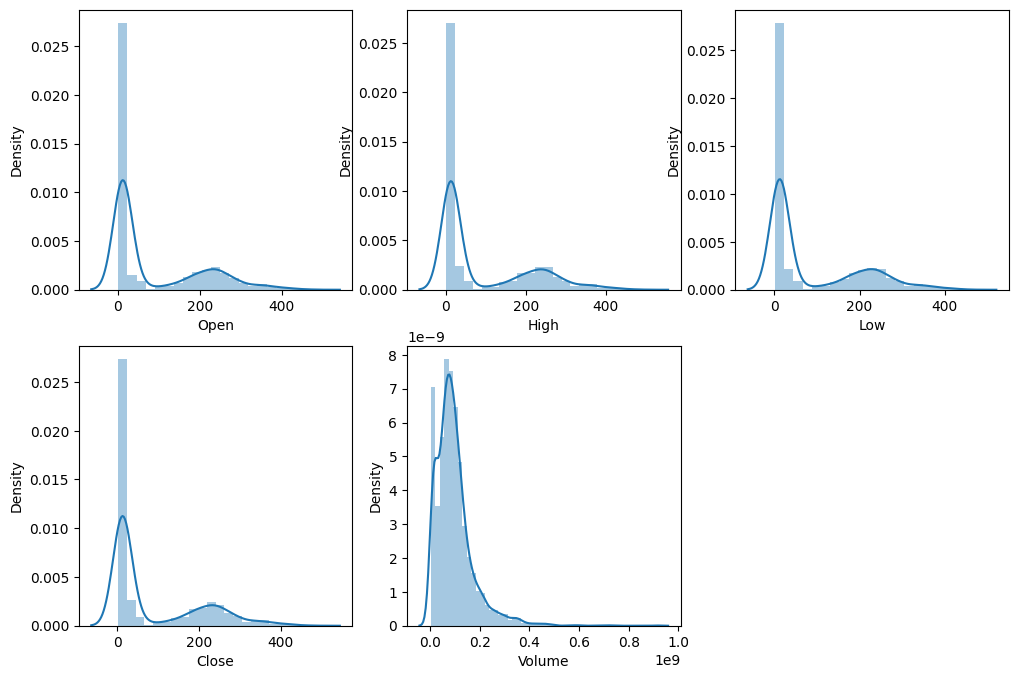

In [47]:
import matplotlib.pyplot as plt
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(12,8))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(tesla_data[col])
plt.show()

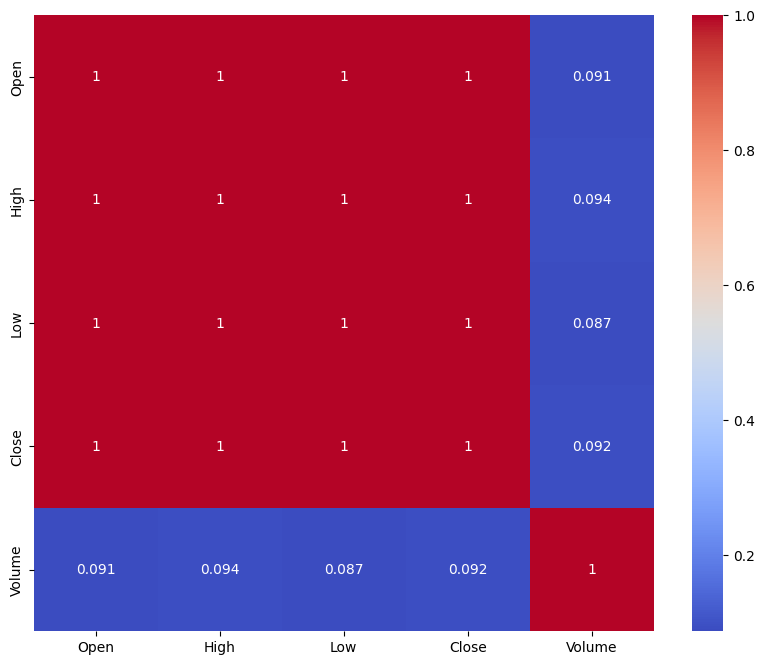

In [48]:
## plot correlation matrix
plt.subplots(figsize=(10,8))
sb.heatmap(tesla_data[features].corr(), annot=True, cmap='coolwarm')
plt.show()

In [49]:
# Sort the data by Date in ascending order
tesla_data = tesla_data.sort_values(by="Date", ascending=True)

# Create the plot, have two rows and one column
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price"), vertical_spacing=0.3)

# Plot Tesla stock price
fig.add_trace(
    go.Scatter(
        x=tesla_data['Date'],
        y=tesla_data['Close'],
        name="Share Price"
    ),
    row=1, col=1 ## plot on the first row, first column
)

# Plot Tesla 
fig.update_layout(
    title="Tesla Close Price",
    showlegend=False,
    height=500,
    xaxis_rangeslider_visible=True
)
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
fig.show()

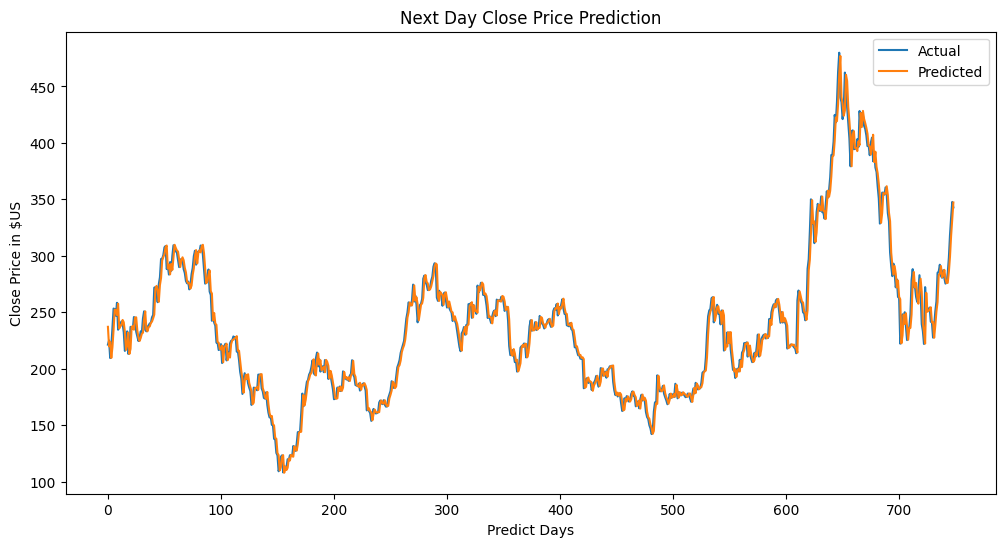

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
tesla_data['Tomorrow_Close'] = tesla_data['Close'].shift(-1)  # Target is next day's close
tesla_data.dropna(inplace=True)  # Remove rows with NaNs

# Features and target
X = tesla_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = tesla_data['Tomorrow_Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and visualize
predictions = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.title('Next Day Close Price Prediction')
plt.legend()
plt.show()

To the first approximatio, only use "Close" feature to predict the next "Close" price

Epoch 1/5


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0098
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 5.4760e-04
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.8690e-04
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.4121e-04
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 3.1987e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


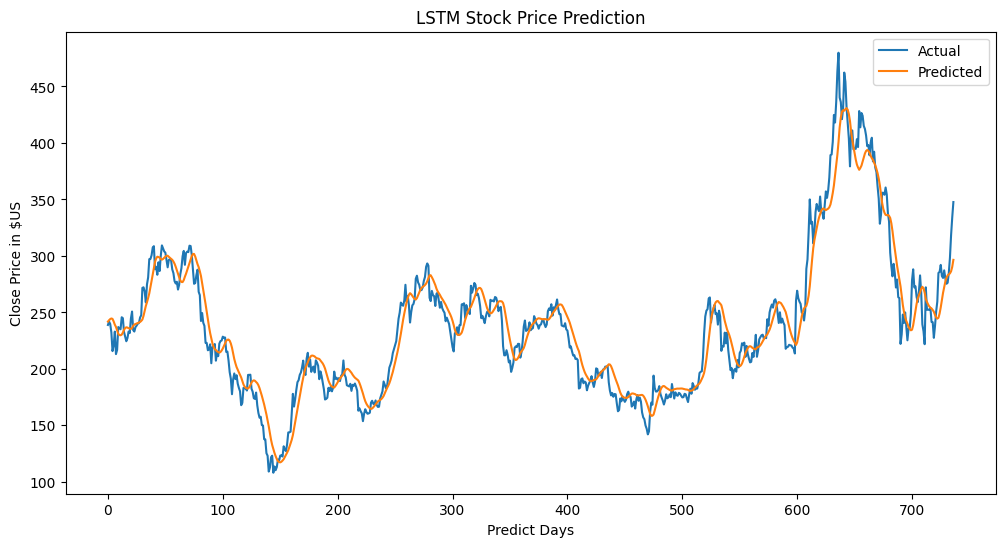

In [51]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Use only the 'Close' price
data = tesla_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare training data
sequence_length = 60 # Number of days to look back
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

# Split into training and test sets
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Predict
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.legend()
plt.show()

Using all features helps the model capture more patterns and relationships in the data, leading to better predictions

Epoch 1/5


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0053
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 6.0711e-04
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.4445e-04
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.1385e-04
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.1177e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Metric,Value
0,Mean Squared Error (MSE),450.478512
1,Root Mean Squared Error (RMSE),21.224479
2,Mean Absolute Error (MAE),15.674867


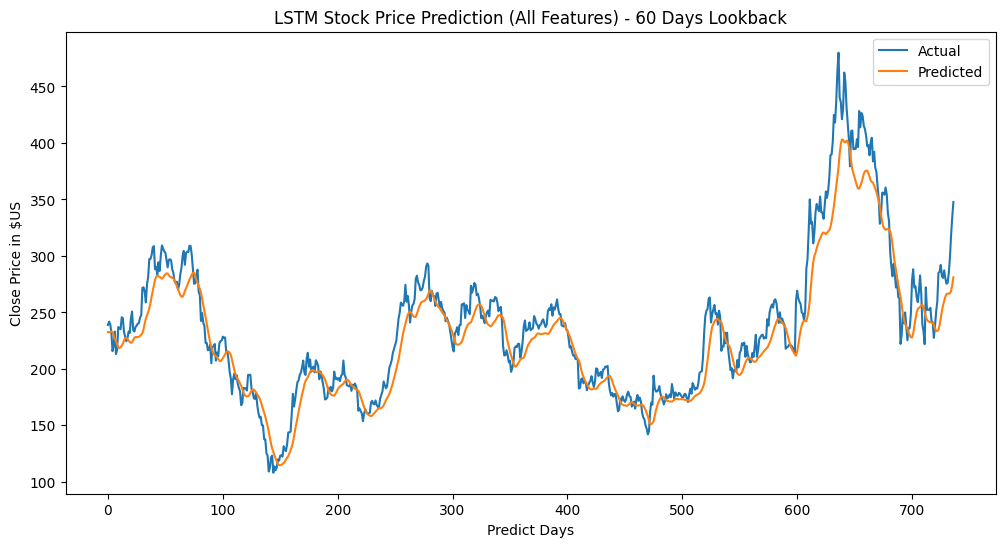

In [52]:
# 1. Select all features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = tesla_data[features].values

# 2. Normalize all features to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Prepare training data using a sliding window
sequence_length = 60
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])  # shape: (60, 5)
    y.append(scaled_data[i, features.index('Close')])  # Predict 'Close' price

X, y = np.array(X), np.array(y)
# X shape: (samples, 60, 5)

# 4. Split into training and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 7. Make predictions
predictions = model.predict(X_test)

# 8. Inverse transform only the 'Close' column for predictions and actuals
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Calculate evaluation metrics
mse_60 = mean_squared_error(actual, predictions)
rmse_60 = np.sqrt(mse_60)
mae_60 = mean_absolute_error(actual, predictions)

# Create a DataFrame for metrics
metrics = {
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)"],
    "Value": [mse_60, rmse_60, mae_60]
}
metrics_df = pd.DataFrame(metrics)
display(metrics_df)
#print(metrics_df.to_string(index=False))

# 9. Plot predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Stock Price Prediction (All Features) - 60 Days Lookback')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.legend()
plt.show()

Look back 30 days for prediction

Epoch 1/5


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0139
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.7586e-04
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0007e-04
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.6188e-04
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.2924e-04
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


,Metric,Value
0,Mean Squared Error (MSE),366.219811
1,Root Mean Squared Error (RMSE),19.136870
2,Mean Absolute Error (MAE),14.126323


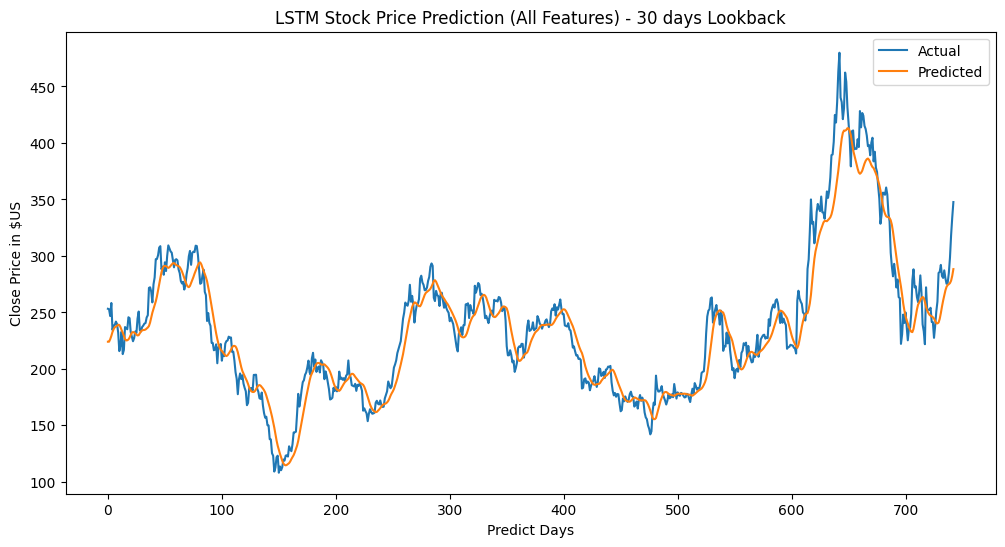

In [53]:
# 1. Select all features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = tesla_data[features].values

# 2. Normalize all features to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Prepare training data using a sliding window
sequence_length = 30
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])  # shape: (60, 5)
    y.append(scaled_data[i, features.index('Close')])  # Predict 'Close' price

X, y = np.array(X), np.array(y)
# X shape: (samples, 60, 5)

# 4. Split into training and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 7. Make predictions
predictions = model.predict(X_test)

# 8. Inverse transform only the 'Close' column for predictions and actuals
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Calculate evaluation metrics
mse_30 = mean_squared_error(actual, predictions)
rmse_30 = np.sqrt(mse_30)
mae_30 = mean_absolute_error(actual, predictions)

# Create a DataFrame for metrics
metrics = {
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)"],
    "Value": [mse_30, rmse_30, mae_30]
}
metrics_df = pd.DataFrame(metrics)
display(metrics_df)
#print(metrics_df.to_string(index=False))

# 9. Plot predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Stock Price Prediction (All Features) - 30 days Lookback')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.legend()
plt.show()

Look back 90 days for prediction

Epoch 1/5


/home/hp/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0118
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.1616e-04
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8706e-04
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.8568e-04
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.1930e-04
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


,Metric,Value
0,Mean Squared Error (MSE),441.868894
1,Root Mean Squared Error (RMSE),21.020678
2,Mean Absolute Error (MAE),15.438307


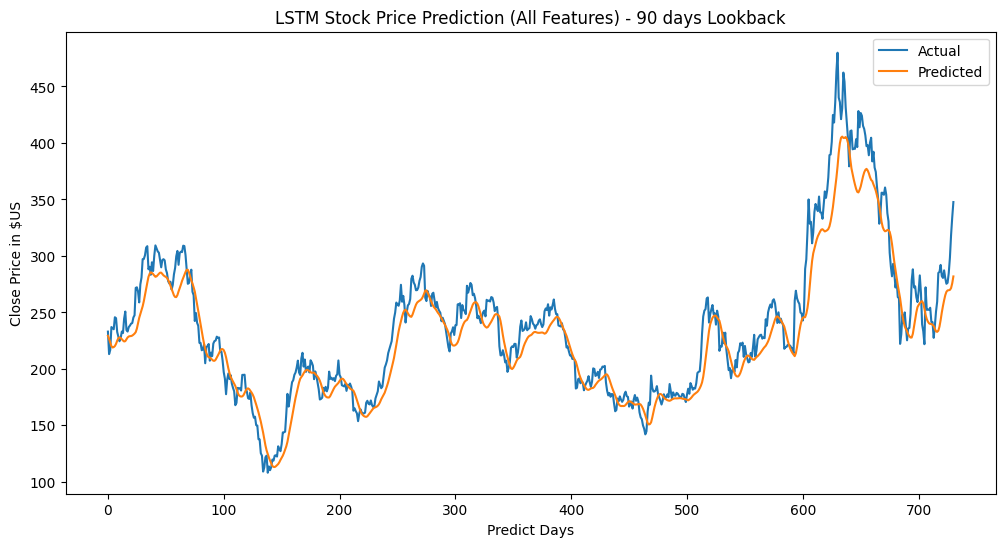

In [54]:
# 1. Select all features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
data = tesla_data[features].values

# 2. Normalize all features to [0, 1] range
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# 3. Prepare training data using a sliding window
sequence_length = 90
X = []
y = []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])  # shape: (60, 5)
    y.append(scaled_data[i, features.index('Close')])  # Predict 'Close' price

X, y = np.array(X), np.array(y)
# X shape: (samples, 60, 5)

# 4. Split into training and test sets (80% train, 20% test)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# 6. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# 7. Make predictions
predictions = model.predict(X_test)

# 8. Inverse transform only the 'Close' column for predictions and actuals
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[3], scaler.scale_[3]
predictions = close_scaler.inverse_transform(predictions.reshape(-1, 1))
actual = close_scaler.inverse_transform(y_test.reshape(-1, 1))

from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Calculate evaluation metrics
mse_90 = mean_squared_error(actual, predictions)
rmse_90 = np.sqrt(mse_90)
mae_90 = mean_absolute_error(actual, predictions)

# Create a DataFrame for metrics
metrics = {
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "Mean Absolute Error (MAE)"],
    "Value": [mse_90, rmse_90, mae_90]
}
metrics_df = pd.DataFrame(metrics)
display(metrics_df)
#print(metrics_df.to_string(index=False))

# 9. Plot predictions vs actual values
plt.figure(figsize=(12,6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM Stock Price Prediction (All Features) - 90 days Lookback')
plt.xlabel('Predict Days')
plt.ylabel('Close Price in $US')
plt.legend()
plt.show()

In [57]:
import pandas as pd

# Suppose you have already run your code for each sequence_length and have the metrics:
results = [
    {"Sequence Length": 30, "MSE": mse_30, "RMSE": rmse_30, "MAE": mae_30},
    {"Sequence Length": 60, "MSE": mse_60, "RMSE": rmse_60, "MAE": mae_60},
    {"Sequence Length": 90, "MSE": mse_90, "RMSE": rmse_90, "MAE": mae_90},
]

summary_df = pd.DataFrame(results)
display(summary_df)
#print(summary_df.to_string(index=False))

,Sequence Length,MSE,RMSE,MAE
0,30,366.219811,19.136870,14.126323
1,60,450.478512,21.224479,15.674867
2,90,441.868894,21.020678,15.438307
